### This document explores advanced fitting of the hydrolysis data, such as fitting the curves obtained to the full solution (Lambert Function)

Throughout this document, the following naming conventions apply: 

$A$ = ATP concentration

$t$ = time

$K_T$ = Michaelis Menten constant for ATP

$K_D$ = Michaelis Menten constant for ADP

$\gamma$ = Hydrolysis Rate 

$m_o$ = Monomeric motor concentration, usually a constant

Note on how hydrolysis rate is reported: 

#### Part 1
Let's start with a simplified model for ATP hydrolysis: 

$\frac{dA}{dt} = - \gamma m_o \frac{\frac{A}{K_T}}{1 +\frac{A}{K_T}}$

At this time, we ignore $K_D$ and $K_P$.
We can non-dimensionalize it by considering $\hat{A} = \frac{A}{K_T}$. The non-dimensionalized equation becomes:

$\frac{d\hat{A}}{dt} = -\frac{\gamma m_o}{K_T} \frac{\hat{A}}{1 +\hat{A}}$

$K_T$ is a constant that has been experimentally quantified. We know the monomeric kinesin concentration we add into the experiment. From this information, we can extract the hydrolysis rate $\gamma$.

Plotting an ideal $\frac{dA}{dt}$ vs $- \gamma m_o \frac{\frac{A}{K_T}}{1 +\frac{A}{K_T}}$, we would obtain a straight line making a 45 degree angle to the x-axis. How does real data compare?


In [1]:
#### ------------- Relevant Imports ------------- ####
# Numpy imports:    
import numpy as np

# Pandas for csv 
import pandas as pd

# for extracting filenames 
import glob

#Matplotlib imports
import matplotlib.pyplot as plt

# skimage submodules we need
import skimage.io

#Scipy imports
import scipy
from scipy import optimize
from scipy.optimize import curve_fit

import os

import atp_hydro
atp_hydro.pboc_style_mpl()
# show images in viridis by default (pboc is fire?)
plt.rcParams['image.cmap'] = 'viridis'

# Import seaborn for aesthetic plots 
import seaborn as sns

from tqdm.notebook import tqdm

import pandas as pd
import ast

from bokeh.plotting import figure, show, curdoc
from bokeh.io import output_notebook
from bokeh.layouts import gridplot
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import ColorBar
from bokeh.transform import linear_cmap
from bokeh.palettes import Viridis256
from bokeh.themes import Theme

import numpy as np
# Enable inline plotting in Jupyter Notebook
# output_notebook()


In [2]:
#### ------------- Load and Read Data ------------- ####

# Load Data from csv file
data_location = '../../analyzed_data/atp-hydro/ATP.csv';

# data_location = '../../analyzed_data/atp-hydro/ADP.csv';

# Read the CSV file into a DataFrame
df = pd.read_csv(data_location); 

# ATP Concentrations
ATP_conc_list = np.array(df["ATP Concentration (uM)"]); 

# ADP Concentrations
ADP_conc_list = np.array(df["ADP Concentration (uM)"]); 

# Phosphate Concentrations
P_conc_list = np.array(df["P Concentration (uM)"]); 

# ATP Curves
ATP_curve_list = [ast.literal_eval(df["ATP Curve (uM)"][i]) for i in range(len(df))]

# Ratio Curves
ratio_curve_list = [ast.literal_eval(df["Ratio (A.U.)"][i]) for i in range(len(df))]

# Goodness of Fit
linear_r2_list = np.array(df["r-squared for linear fit"]); 
exponential_r2_list = np.array(df["r-squared for exponential fit"]); 

# Hydrolysis Rate
linear_hydrolysis_rate_list = np.array(df["Hydrolysis Rate (uM/s/motor) from Linear Fitting (-abs(Slope)/Motconc)"]); 
exponential_hydrolysis_rate_list = np.array(df["Hydrolysis Rate (uM/s/motor) from Exponential Curve"]); 

# Time
times_list = [ast.literal_eval(df["Time Array (s)"][i]) for i in range(len(df))]

findfont: Font family ['Lucida Sans Unicode'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lucida Sans Unicode'] not found. Falling back to DejaVu Sans.


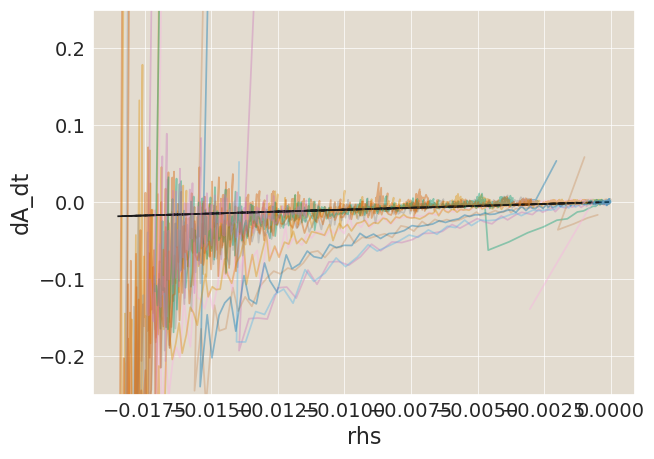

In [3]:
# Assume K_T  value 
K_T = 50; #uM

# Motor concentration 
m_o = 1; #uM


for i in range(len(ATP_curve_list)):
    A = ATP_curve_list[i]

    # Non dimensionalize a curve
    A_nd = np.array(ATP_curve_list[i])/K_T
    time = times_list[i]

    # Get first differential
    dA_dt = np.diff(A_nd)

    # Get rhs term of the equation
    rhs = -(m_o/K_T)*(A_nd)/(1 + A_nd)

    # # Plots
    # plt.plot(time, A)
    # plt.xlabel("time")
    # plt.ylabel("ATP conc")

    # plt.figure()
    # plt.plot(time, A_nd)
    # plt.plot(time[:5], A_nd[:5], 'or')

    # plt.plot(time[:-1], dA_dt)
    # plt.plot(time[:5], dA_dt[:5], 'or')
    # plt.xlabel("time")
    # plt.ylabel("A_hat")

    # plt.figure()
    plt.plot(rhs[:-1], dA_dt, alpha = 0.4)
    # plt.plot(rhs[:5], dA_dt[:5], 'or')
    plt.xlabel("rhs")
    plt.ylabel("dA_dt")
    plt.ylim([-0.25,0.25])
    # Plot a 45 degree line
    plt.plot(np.arange(min(rhs), max(rhs), 0.001), np.arange(min(rhs), max(rhs), 0.001), '--k')
    

#### Part 2

The solution to the equation $\frac{d\hat{A}}{dt} = -\frac{\gamma m_o}{K_T} \frac{\hat{A}}{1 +\hat{A}}$ is 

$\hat{A} + ln(\hat{A}) = - \frac{- \gamma m_o}{K_T}t + C$

What does plotting $\hat{A} + ln(\hat{A})$ vs time look like?

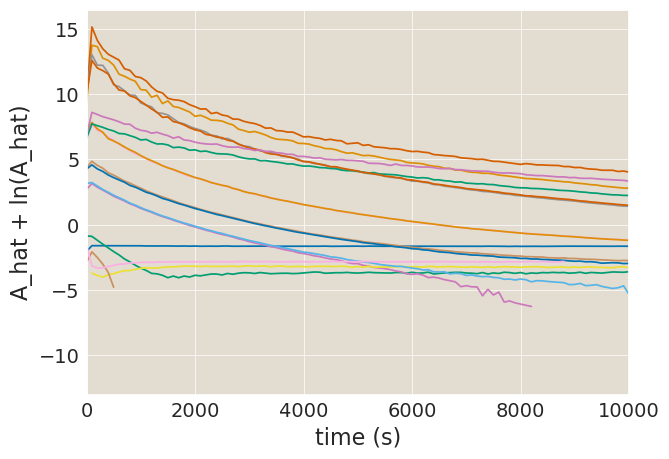

In [4]:
i = 10; 

# Assume K_T  value 
K_T = 50; #uM

# Motor concentration 
m_o = 1; #uM


for i in range(len(ATP_curve_list)):
    A = ATP_curve_list[i]

    # Non dimensionalize a curve
    A_nd = np.array(ATP_curve_list[i])/K_T
    time = times_list[i]

    # Get first differential
    dA_dt = np.diff(A_nd)

    # Get rhs term of the equation
    rhs = -(m_o/K_T)*(A_nd)/(1 + A_nd)

    # Plots
    plt.plot(time, A_nd + np.log(A_nd))
    plt.ylabel('A_hat + ln(A_hat)')
    plt.xlabel('time (s)')

    # plt.ylim([0, 20])
    plt.xlim([0, 10000])

What if we consider K effective instead, where 

\begin{align}
 K_{eff} = \frac{1 + y_o*(\frac{1}{K_D} + \frac{1}{K_P})}{\frac{1}{K_T} - \frac{1}{K_D} + \frac{1}{K_P}} \,.
\end{align}

How does $K_{eff}$ vary with $y_o$?

0.029012845215157353 0.03558718861209964


Text(0.5, 1.0, 'K_eff vs ATP Concentration')

findfont: Font family ['Lucida Sans Unicode'] not found. Falling back to DejaVu Sans.


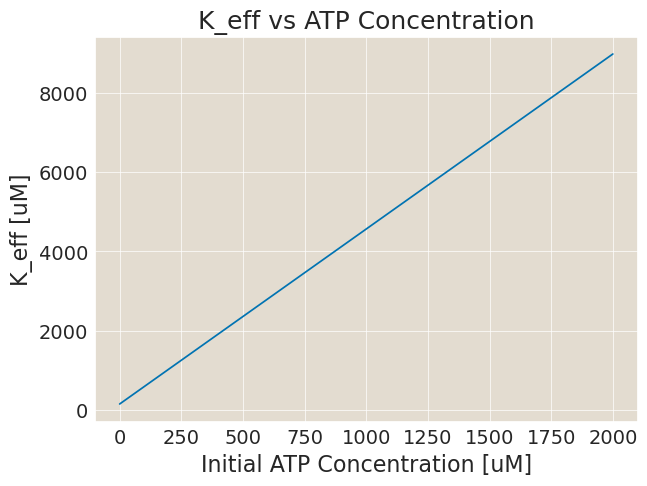

In [5]:
K_T = 28.1; 
 
K_D = 34.6; #uM

K_P = 9000; #uM 

K_inv = (1/K_D) + (1/K_P); #uM-1 

print(K_inv, 1/K_T)

y_o_list = np.arange(0, 2000)
K_eff_func = lambda y_o: (1 + (y_o*K_inv))/((1/K_T) - K_inv) # Units uM
K_eff_list = K_eff_func(y_o_list)
plt.plot(y_o_list, K_eff_list)
plt.xlabel("Initial ATP Concentration [uM]")
plt.ylabel("K_eff [uM]")
plt.title("K_eff vs ATP Concentration")

Setting up fitting functions:

In [6]:
### Fitting parameters

def line(x, slope, cutoff): 
    return -slope*x + cutoff

#Curve-fit to the Langmuir curve
def fitting(data, time_curve, p0):
    """
    Performs a curve fitting using scipy.optimize.curve_fit 
    
    Parameters
    p0 = 1D list with 4 entries of parameter guesses
    
    Returns
    param = 1D list with fit values of each parameter
    curve = 1D array of intensity values for every concentration in xvals
    xvals = 1D array from 0 to maxconc with step size 1
    """
    
    
    #Curve fits and returns parameter values as well as the covarience
    param, param_cov = curve_fit(line, 
                                 data, 
                                 time_curve, 
                                 p0, 
                                 #bounds = (-np.ones([2])*np.inf, np.ones([2])*np.inf)
                                )

    #stores the new function information according to the coefficients given by curve-fit() function 

    curve = line(time, param[0], param[1])
    
    print(param, param_cov)
    return param, param_cov

### Formulae for reference:

Non-dimensionalisation of ATP curve: 

\begin{align}
\hat{y} = \frac{y}{K}, \text{ where } K = K_T \text{ or } K = K_{eff}
\end{align}

Choice of rate constants: 

K_T = 28.1 uM

K_D = 34.6 uM

K_P = 9000 uM 


\begin{align}
K_{eff} = \frac{K_T*(1 + y_o*(\frac{1}{K_D} + \frac{1}{K_P}))}{\gamma*m}
\end{align}

Scaling Time:

\begin{align}
\hat{t} = \frac{t * \gamma*m}{K_T*(1 + y_o*(\frac{1}{K_D} + \frac{1}{K_P})}
\end{align}

Reporting hydrolysis rate: 

We know concentration of motors $m = 1$uM. Assume $\gamma = 1 s^{-1}$.

Plot $\hat{y} - \hat{y_o} + ln(\frac{\hat{y}}{\hat{y_o}}) = -\hat{t}$ and fit linear curve. Then, $\gamma' = slope$. If we obtain $slope = 1$, then $\gamma' = \gamma = 1$. Otherwise, $\gamma'$ gives the "corrected" hydrolysis rate.

<!-- \begin{align}
\gamma = \frac{slope*K_T*(1 + y_o*(\frac{1}{K_D} + \frac{1}{K_T}))}{m} \text{, units $s^{-1}$.}
\end{align} -->


<!-- Note that for the above choice of menten constants, for $y_o = 1410 uM$,

\begin{align}
\frac{K_T*(1 + y_o*(\frac{1}{K_D} + \frac{1}{K_T}))}{m} \approx 1177
\end{align} -->

The above is compared to the linear hydrolysis rate, which is obtained by fitting a linear curve to the initial part of the ATP vs time curve, and asserting $\gamma_l = \frac{slope}{m}$.

Initial ATP conc:  5.667104596897517
[0.00057805 0.40693839] [[2.75918514e-09 8.43267375e-08]
 [8.43267375e-08 3.35037263e-06]]
[1.38990191e-04 8.38270811e+00] [[1.58212006e-10 1.58212014e-07]
 [1.58212014e-07 2.05675613e-04]]


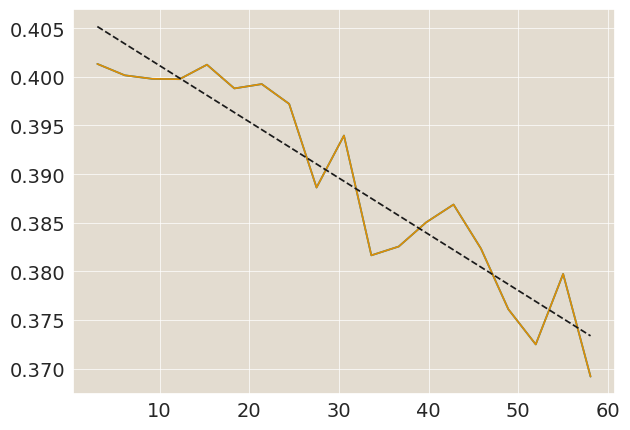

Initial ATP conc:  364.5141775042381
[0.11957192 0.56227115] [[1.82901479e-05 5.62299419e-05]
 [5.62299419e-05 2.24730183e-04]]
[1.28404196e-01 5.60368960e+02] [[3.65658587e-05 3.65658591e-02]
 [3.65658591e-02 4.75356173e+01]]


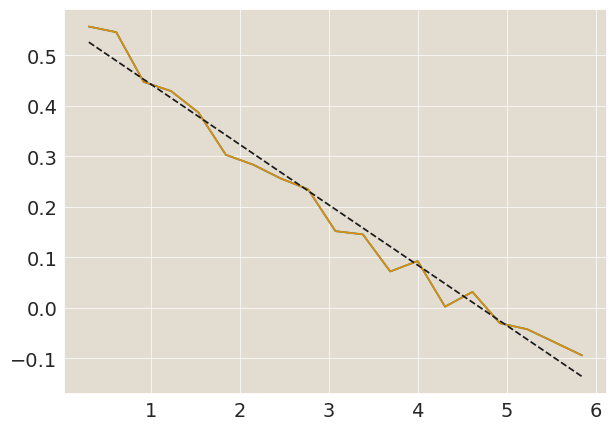

Initial ATP conc:  15.41510051380279
[ 0.06956268 -0.23500615] [[2.44084040e-05 6.00196867e-04]
 [6.00196867e-04 1.91863077e-02]]
[6.28252090e-03 1.00799423e+01] [[8.99158680e-07 8.99158675e-04]
 [8.99158675e-04 1.16890627e+00]]


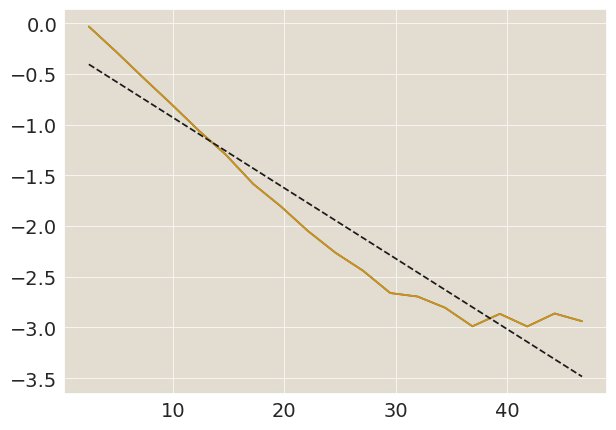

Initial ATP conc:  381.13642499300414
[0.12548441 0.591376  ] [[2.21542939e-05 6.53855285e-05]
 [6.53855285e-05 2.50869992e-04]]
[1.37740169e-01 5.99023453e+02] [[4.95084892e-05 4.95084890e-02]
 [4.95084890e-02 6.43610359e+01]]


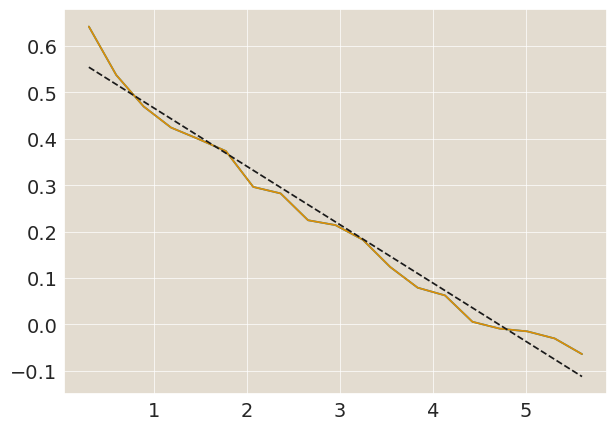

Initial ATP conc:  100.14061347588706
[0.09642597 0.23878698] [[1.36774129e-07 1.24633878e-06]
 [1.24633878e-06 1.47642574e-05]]
[4.75035427e-02 1.09362082e+02] [[4.71717944e-06 4.71717943e-03]
 [4.71717943e-03 6.13233324e+00]]


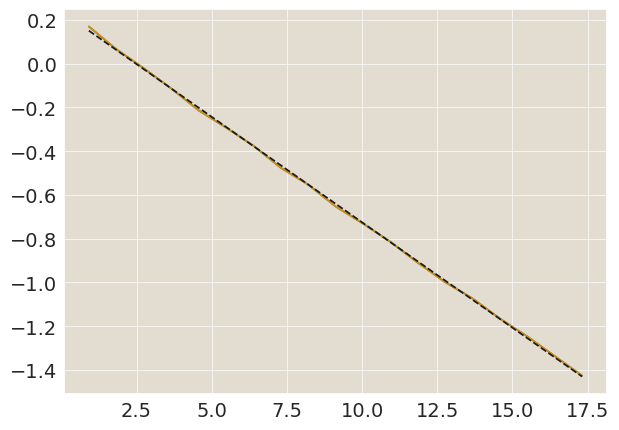

Initial ATP conc:  159.75231989359256
[0.10569768 0.17333351] [[8.41599906e-07 5.31514980e-06]
 [5.31514980e-06 4.36383877e-05]]
[6.36012171e-02 1.72581738e+02] [[6.33320511e-06 6.33320513e-03]
 [6.33320513e-03 8.23316670e+00]]


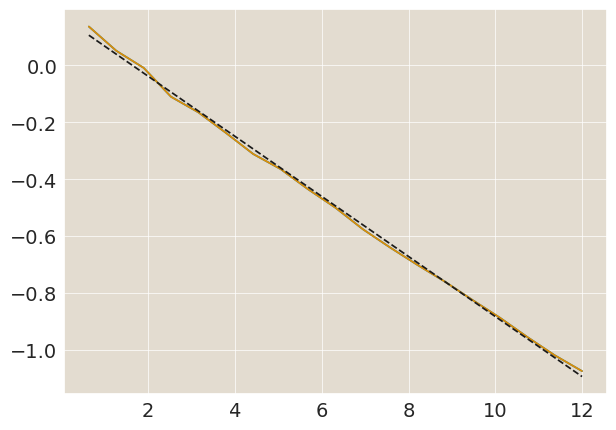

Initial ATP conc:  251.52796247272224
[0.11472355 0.20909814] [[2.62176044e-06 1.12444245e-05]
 [1.12444245e-05 6.26938316e-05]]
[8.56198051e-02 2.88090672e+02] [[9.25445940e-06 9.25445940e-03]
 [9.25445940e-03 1.20307973e+01]]


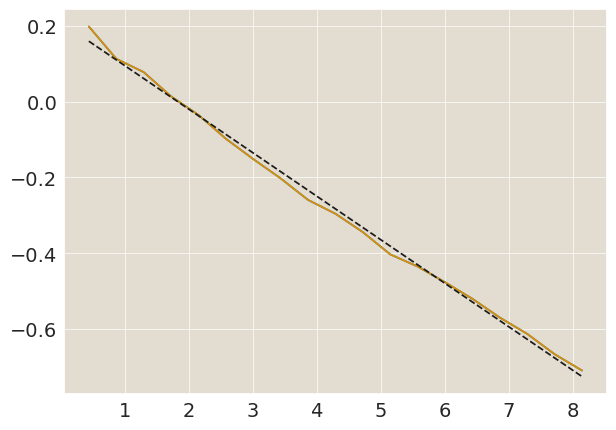

Initial ATP conc:  410.3060096675999
[0.14302111 0.30212581] [[2.54465627e-05 7.01768036e-05]
 [7.01768036e-05 2.51594644e-04]]
[1.28184049e-01 5.13516057e+02] [[4.32537596e-05 4.32537592e-02]
 [4.32537592e-02 5.62298865e+01]]


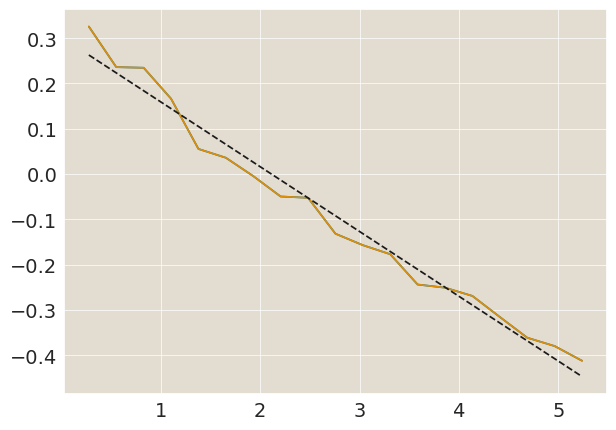

Initial ATP conc:  1.1708224476509554
[-0.0125932  -0.20971656] [[1.43840946e-06 5.44579671e-05]
 [5.44579671e-05 2.57295325e-03]]
[-6.17832645e-04  8.91372355e-01] [[1.96834762e-09 2.16518238e-06]
 [2.16518238e-06 2.97220490e-03]]


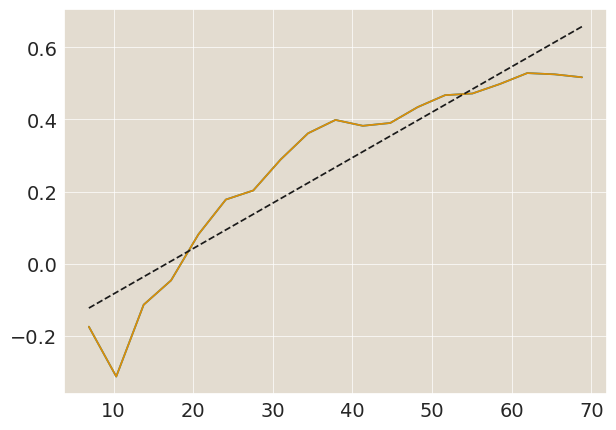

Initial ATP conc:  115.62972702290607
[0.10620224 0.09523197] [[1.96247051e-07 1.60373963e-06]
 [1.60373963e-06 1.70375810e-05]]
[4.85211992e-02 1.11922929e+02] [[5.02110532e-06 5.02110532e-03]
 [5.02110532e-03 6.52743691e+00]]


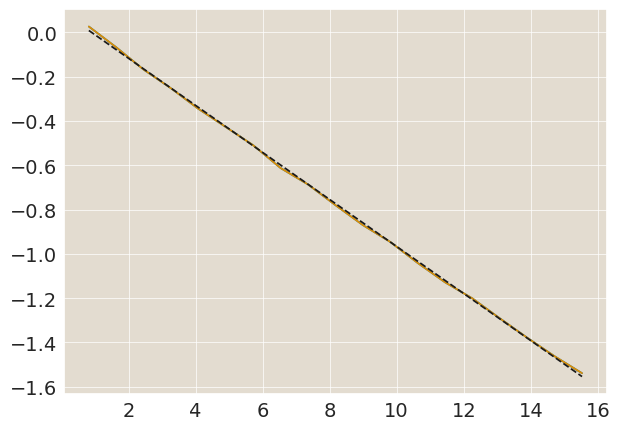

Initial ATP conc:  156.07396472260825
[0.10023359 0.1321399 ] [[4.65759923e-07 2.99830628e-06]
 [2.99830628e-06 2.50918812e-05]]
[5.89438254e-02 1.63312915e+02] [[4.41166607e-06 4.41166604e-03]
 [4.41166604e-03 5.73516582e+00]]


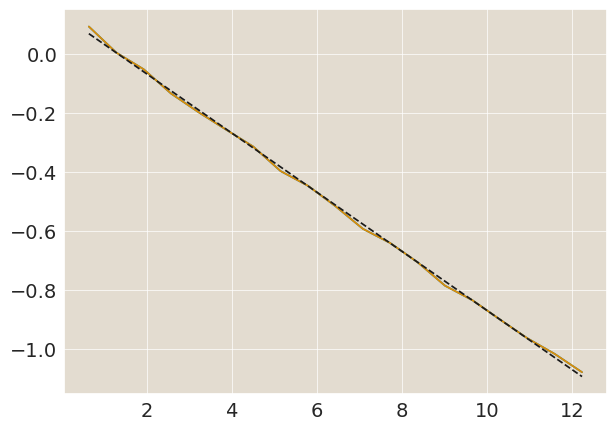

Initial ATP conc:  270.0690607881042
[0.12099891 0.12917331] [[4.70918877e-06 1.89674973e-05]
 [1.89674973e-05 9.93155640e-05]]
[8.62143874e-02 2.89975302e+02] [[1.19196087e-05 1.19196086e-02]
 [1.19196086e-02 1.54954910e+01]]


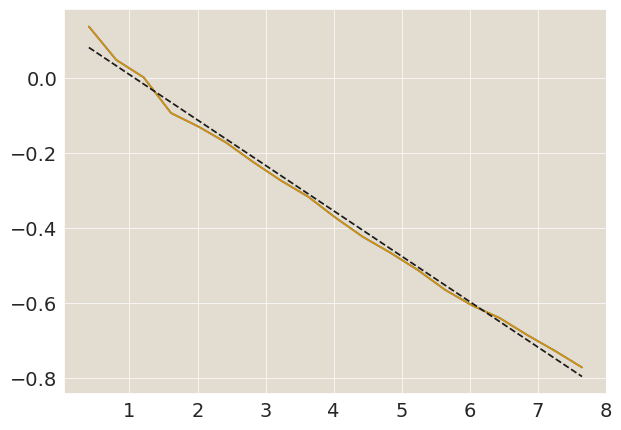

Initial ATP conc:  250.59535743601828
[0.05096934 0.21755397] [[1.57139279e-06 6.76156914e-06]
 [6.76156914e-06 3.78227917e-05]]
[4.60493499e-02 2.97337463e+02] [[1.96811349e-06 1.96811349e-03]
 [1.96811349e-03 2.55854754e+00]]


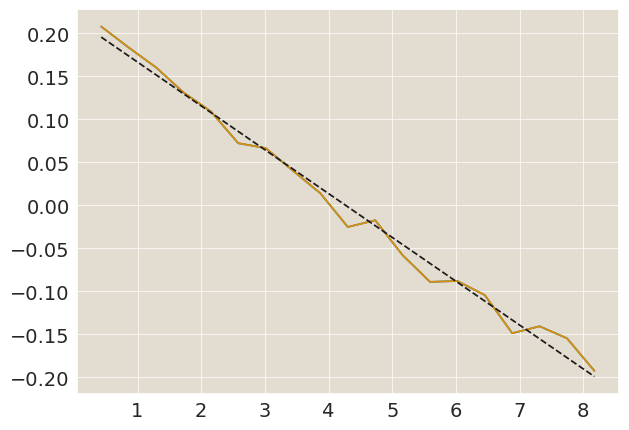

Initial ATP conc:  395.5136921062948
[0.13704984 0.32553151] [[1.28941694e-05 3.67830112e-05]
 [3.67830112e-05 1.36409476e-04]]
[1.24180608e-01 5.03844469e+02] [[2.52731151e-05 2.52731152e-02]
 [2.52731152e-02 3.28550501e+01]]


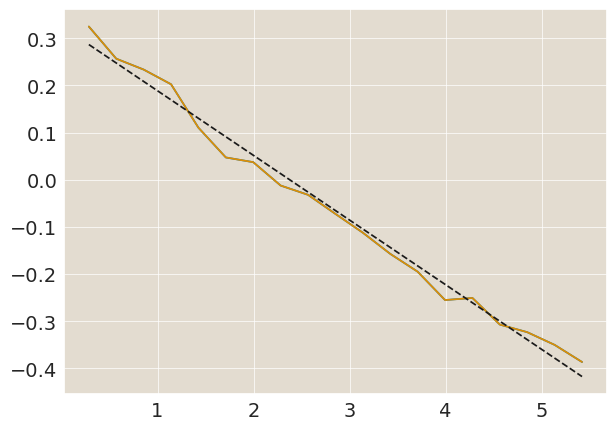

Initial ATP conc:  259.1941795312882
[0.05241638 0.32497603] [[2.48649635e-06 1.03858948e-05]
 [1.03858948e-05 5.63953592e-05]]
[5.11748099e-02 3.35272938e+02] [[3.25013394e-06 3.25013396e-03]
 [3.25013396e-03 4.22517415e+00]]


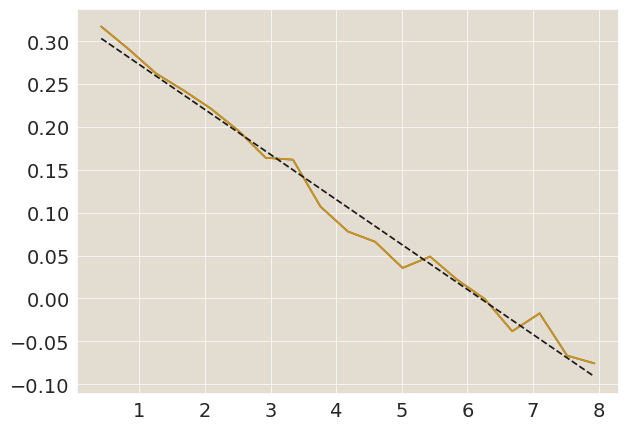

Initial ATP conc:  2.5789830547032695
[0.19303703 1.59910158] [[0.00058919 0.00585241]
 [0.00585241 0.07104975]]
[0.01264525 6.41702535] [[1.28553246e-06 3.85659736e-04]
 [3.85659736e-04 1.41408569e-01]]


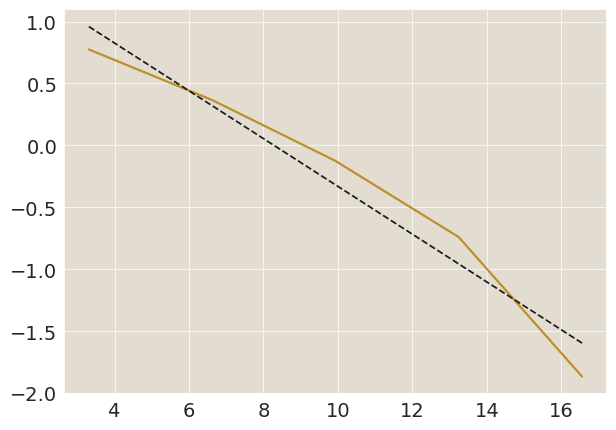

Initial ATP conc:  8.945209074516736
[-0.00877598 -1.60732374] [[1.23645015e-06 3.49351949e-05]
 [3.49351949e-05 1.28319624e-03]]
[-5.55856451e-04  1.84730444e+00] [[4.01881565e-09 4.01881566e-06]
 [4.01881566e-06 5.22446038e-03]]


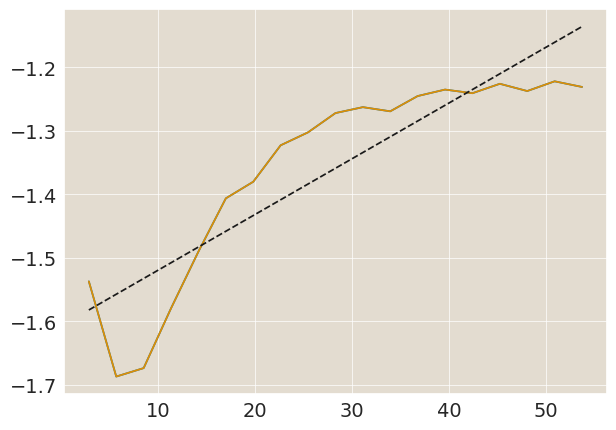

In [7]:
fitting_information = [];

# Pandas dataframe
m = 1; #motor concentration (uM)

# For an ideal curve
gamma = 1; # assume hydrolysis rate = 1 ATP/motor/s (s-1)

# Plotting properties
line_size = 2;
size = 600; 
plot1 = figure(title="Non dimensionalized ΑΤP vs Scaled Time (K_T and K_eff)", width=size, height=size)
plot2 = figure(title="y - y0 + ln(y/y0) non-dimensionalised (K_T) vs Scaled Time", width=size, height=size)
plot3 = figure(title="y - y0 + ln(y/y0) non-dimensionalised (K_eff) vs Scaled Time", width=size, height=size)
plot4 = figure(title="ATP vs Time", width=size, height=size)
plot5 = figure(title="y - y0 + ln(y/y0) non-dimensionalised (K_eff) vs Time (s)", width=size, height=size)
plot6 = figure(title="log(ATP) vs Time", width=size, height=size)

for i in range(len(ATP_curve_list)): 
    
    # ATP curve should not be empty 
    if len(ATP_curve_list[i]) == 0: 
        break
        
#     y_o = ATP_conc_list[i]; #initial ATP concentration (according to experimental plan)
    y_o = ATP_curve_list[i][0]; #initial ATP concentration
    y_o_exp = ATP_conc_list[i];

    print('Initial ATP conc: ', y_o)
    
    # Get time curve 
    time = np.array(times_list[i])

    # Generate a color
    color = plt.cm.viridis(y_o/800);
    color = "#{:02x}{:02x}{:02x}".format(int(color[0] * 255),
                                         int(color[1] * 255),
                                         int(color[2] * 255))

    #### --------- Without K_eff --------- ####
    A = ATP_curve_list[i]
    
    # Non-dimensionalise time
    idealised_time_constant_K_T = K_T/(gamma*m);
    time_nd_K_T = time/idealised_time_constant_K_T;
    
    # Non-dimensionalize a curve
    A_nd = np.array(ATP_curve_list[i])/K_T

    #### --------- With K_eff --------- ####

    K_eff = K_eff_func(y_o)
    
    # Non-dimensionalise time
#     idealised_time_constant_K_eff = K_eff/(gamma*m);
    idealised_time_constant_K_eff = (K_T*(1 + (y_o*K_inv)))/(gamma*m);
    time_nd_K_eff = time/idealised_time_constant_K_eff; 
    
    # Non dimensionalise ATP 
    A_nd_K_eff = np.array(ATP_curve_list[i])/K_eff; 
    
    #### --------- Plots --------- ####
    
    plot1.line(time_nd_K_T, A_nd + np.log(A_nd), line_color=color, line_dash="dotted")
    plot1.circle(time_nd_K_T, A_nd + np.log(A_nd), size = 1, fill_color="white", line_color=color)
    
    # Data
#     plot1.line(time_nd_K_eff, A_nd_K_eff + np.log(A_nd_K_eff), line_color=color, line_dash="dotted")
#     plot1.circle(time_nd_K_eff, A_nd_K_eff + np.log(A_nd_K_eff), size = 1, fill_color="white", line_color="blue")
    
    plot1.line(time_nd_K_eff, A_nd_K_eff - y_o/K_eff + np.log(A_nd_K_eff/(y_o/K_eff)), 
               line_color=color, line_dash="dotted")
    plot1.circle(time_nd_K_eff, A_nd_K_eff - y_o/K_eff + np.log(A_nd_K_eff/(y_o/K_eff)), 
                 size = 1, fill_color="white", line_color=color)
    
    # Ideal curve (45 degree line)
    plot1.line(np.arange(0, np.amax(time_nd_K_eff)), - np.arange(0, np.amax(time_nd_K_eff)), 
               line_color="black", line_dash="dotted")
    
#     plot2.line(time_nd_K_T, A_nd + np.log(A_nd), line_color=color, line_dash="dotted")
    plot2.line(time_nd_K_T, A_nd - y_o/K_T + np.log(A_nd/(y_o/K_T)), 
               line_color=color, line_dash="dotted")
    plot2.circle(time_nd_K_T, A_nd - y_o/K_T + np.log(A_nd/(y_o/K_T)), 
                 size = 1, fill_color="white", line_color=color) 
    
    # Data
    y3 = A_nd_K_eff - y_o/K_eff + np.log(A_nd_K_eff/(y_o/K_eff));
    plot3.line(time_nd_K_eff, y3, 
               line_color=color, line_dash="dotted")
    plot3.circle(time_nd_K_eff, y3, 
                 size = line_size, fill_color="white", line_color=color)
    

    plot4.line(time, A, 
               line_color=color, line_dash="dotted", line_width = line_size)
    plot4.circle(time, A, 
                 size = line_size, fill_color="white", line_color=color)
    
    plot5.line(time, y3, 
               line_color=color, line_dash="dotted")
    plot5.circle(time, y3, 
                 size = line_size, fill_color="white", line_color=color)
    
    plot6.line(time, np.log(A), 
               line_color=color, line_dash="dotted")
    plot6.circle(time, np.log(A), 
                 size = line_size, fill_color="white", line_color=color)
    #### --------- Fitting --------- ####
    n1, n2 = [1, 20]; # number of datapoints
    
    # Ignore if infs. This usually corresponds to y_o = 0; 
    if np.all(np.isinf(y3[n1:n2])) != True and len(y3[n1:n2]) >=2: 
        plt.plot(time_nd_K_eff[n1:n2], y3[n1:n2])
        params, param_cov = fitting(time_nd_K_eff[n1:n2], y3[n1:n2], [1,1]);
        
        linear_params, linear_param_cov = fitting(time[n1:n2], A[n1:n2], [1,1]);

        plt.plot(time_nd_K_eff[n1:n2], y3[n1:n2])
        plt.plot(time_nd_K_eff[n1:n2], line(time_nd_K_eff[n1:n2], params[0], params[1]), '--k')
        plt.show()
        
        fitting_information.append(
        {
            'Data Location': df["Data Location"][i],
            'Data Index': i,
            'Initial ATP Conc': y_o,
            'Fitted Parameters (-Slope, Y-intercept)':  params, 
            'Fitting Covariance Matrix': param_cov,
#             'Hydrolysis Rate': params[0]*K_T*(1 + y_o*K_inv)/m,
            'Hydrolysis Rate': params[0],
            'Linear Hydrolysis Rate': linear_params[0]/m
        }
        )

# Add color bar
mapper = linear_cmap(field_name='color', palette=Viridis256, low=0, high=800)
color_bar = ColorBar(color_mapper=mapper['transform'], width=8, location=(0, 0))
plot1.add_layout(color_bar, 'right')
plot2.add_layout(color_bar, 'right')
plot3.add_layout(color_bar, 'right')
plot4.add_layout(color_bar, 'right')
plot5.add_layout(color_bar, 'right')

# Labels 
plot1.xaxis.axis_label = "Scaled Time"
plot1.yaxis.axis_label = "y - y0 + ln(y/y0) non-dimensionalised K_T/K_eff"

plot2.xaxis.axis_label = "Scaled Time"
plot2.yaxis.axis_label = "y - y0 + ln(y/y0) non-dimensionalised K_T"
    
plot3.xaxis.axis_label = "Scaled Time"
plot3.yaxis.axis_label = "y - y0 + ln(y/y0) non-dimensionalised K_eff"

plot4.xaxis.axis_label = "Time (s)"
plot4.yaxis.axis_label = "ATP (uM)"

plot5.xaxis.axis_label = "Time (s)"
plot5.yaxis.axis_label = "y - y0 + ln(y/y0) non-dimensionalised K_eff"

# Ideal line 
plot3.line(np.arange(0,np.amax(time_nd_K_eff)), - np.arange(0,np.amax(time_nd_K_eff)), line_color="black")
    
# Arrange the plots in a grid layout
grid = gridplot([[plot4, plot6, plot2], [plot5, plot3]])

# Show the grid layout
show(grid)

fitting_information = pd.DataFrame(fitting_information)

In [8]:
print(K_T*(1 + 141*K_inv)/m)

143.05179402697496


In [9]:
fitting_information

,Data Location,Data Index,Initial ATP Conc,"Fitted Parameters (-Slope, Y-intercept)",Fitting Covariance Matrix,Hydrolysis Rate,Linear Hydrolysis Rate
0,/Volumes/Najma/ATP/1_variation of ATP/Nikon_10...,0,5.667105,"[0.0005780455738733341, 0.40693839233203]","[[2.7591851403491833e-09, 8.43267375498413e-08...",0.000578,0.000139
1,/Volumes/Najma/ATP/1_variation of ATP/Nikon_10...,1,364.514178,"[0.11957192351213544, 0.5622711501587762]","[[1.8290147898917962e-05, 5.622994194788182e-0...",0.119572,0.128404
2,/Volumes/Najma/ATP/1_variation of ATP/Nikon_10...,2,15.415101,"[0.06956268278119337, -0.23500615367204833]","[[2.4408404007821857e-05, 0.000600196866748368...",0.069563,0.006283
3,/Volumes/Najma/ATP/1_variation of ATP/Nikon_10...,3,381.136425,"[0.12548441336644486, 0.59137600464384]","[[2.215429388777776e-05, 6.53855284876943e-05]...",0.125484,0.137740
4,/Volumes/Najma/ATP/1_variation of ATP/Nikon_10...,4,100.140613,"[0.09642596527953688, 0.23878698496576387]","[[1.3677412928743467e-07, 1.2463387766091858e-...",0.096426,0.047504
5,/Volumes/Najma/ATP/1_variation of ATP/Nikon_10...,5,159.752320,"[0.10569767516887223, 0.17333351187272758]","[[8.415999062713928e-07, 5.315149802732878e-06...",0.105698,0.063601
6,/Volumes/Najma/ATP/1_variation of ATP/Nikon_10...,6,251.527962,"[0.11472355010152861, 0.20909814341066896]","[[2.6217604399362304e-06, 1.1244424539818032e-...",0.114724,0.085620
7,/Volumes/Najma/ATP/1_variation of ATP/Nikon_10...,7,410.306010,"[0.14302110566176374, 0.3021258055960404]","[[2.54465627140461e-05, 7.017680361618308e-05]...",0.143021,0.128184
8,/Volumes/Najma/ATP/1_variation of ATP/Nikon_10...,8,1.170822,"[-0.012593201864234306, -0.20971656465223396]","[[1.4384094641256543e-06, 5.4457967081376714e-...",-0.012593,-0.000618
9,/Volumes/Najma/ATP/2_variation of ATP/200uMATP_2,9,115.629727,"[0.10620224125161655, 0.09523196825929363]","[[1.9624705119403314e-07, 1.6037396257282468e-...",0.106202,0.048521


In [10]:
fitting_information["Data Location"].values

array(['/Volumes/Najma/ATP/1_variation of ATP/Nikon_10X_bin1_20sFrameInterval_100ms480_150ms405_1uMmicro_1400nM_A81D_2/0uMATP',
       '/Volumes/Najma/ATP/1_variation of ATP/Nikon_10X_bin1_20sFrameInterval_100ms480_150ms405_1uMmicro_1400nM_A81D_2/1000uMATP_1',
       '/Volumes/Najma/ATP/1_variation of ATP/Nikon_10X_bin1_20sFrameInterval_100ms480_150ms405_1uMmicro_1400nM_A81D_2/100uMATP_1',
       '/Volumes/Najma/ATP/1_variation of ATP/Nikon_10X_bin1_20sFrameInterval_100ms480_150ms405_1uMmicro_1400nM_A81D_2/1420uMADP_1',
       '/Volumes/Najma/ATP/1_variation of ATP/Nikon_10X_bin1_20sFrameInterval_100ms480_150ms405_1uMmicro_1400nM_A81D_2/200uMATP_1',
       '/Volumes/Najma/ATP/1_variation of ATP/Nikon_10X_bin1_20sFrameInterval_100ms480_150ms405_1uMmicro_1400nM_A81D_2/300uMATP_1',
       '/Volumes/Najma/ATP/1_variation of ATP/Nikon_10X_bin1_20sFrameInterval_100ms480_150ms405_1uMmicro_1400nM_A81D_2/470uMATP_1',
       '/Volumes/Najma/ATP/1_variation of ATP/Nikon_10X_bin1_20sFrameInterval_

### Visualising Hydrolysis Rate Distribns

In [11]:
# plot6 = figure(title="Non dimensionalized ΑΤP vs Time (K_eff)", width=size, height=size)
plot7 = figure(title="From K_eff fit", width=size, height=size)
plot8 = figure(title="From Linear fit", width=size, height=size)
circle_size = 10;

# plt.figure()
# plt.hist(fitting_information["Hydrolysis Rate"], bins = 100);
# plt.xlabel("Hydrolysis Rate (s-1)")
# plt.ylabel("Count")

# plt.figure()
plot7.circle(fitting_information["Initial ATP Conc"], fitting_information["Hydrolysis Rate"], size = circle_size);
plot7.yaxis.axis_label = "Hydrolysis Rate (s-1)"
plot7.xaxis.axis_label = "ATP[t=0] (uM), Experimental Plan"

plot8.circle(fitting_information["Initial ATP Conc"], fitting_information["Linear Hydrolysis Rate"], size = circle_size);
plot8.yaxis.axis_label = "Hydrolysis Rate (s-1)"
plot8.xaxis.axis_label = "ATP[t=0] (uM), Experimental Plan"

# Arrange the plots in a grid layout
grid = gridplot([[plot7, plot8]])

# Show the grid layout
show(grid)

### Visualising Individual Fits

/var/folders/f0/pddct2nd5dxf7qtf3z57b8_c0000gn/T/ipykernel_51462/1127559575.py:33: RuntimeWarning: divide by zero encountered in divide
  y3 = A_nd_K_eff - y_o/K_eff + np.log(A_nd_K_eff/(y_o/K_eff));


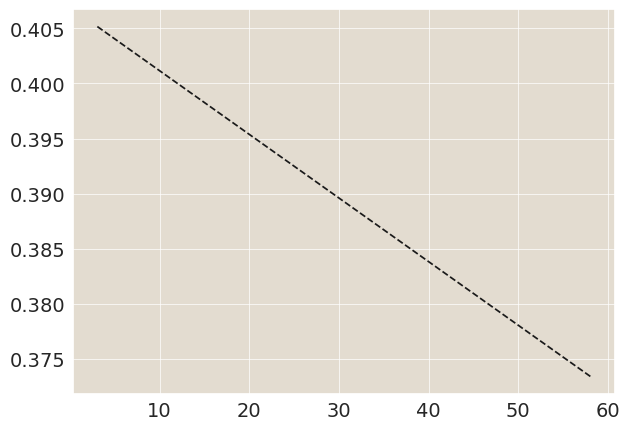

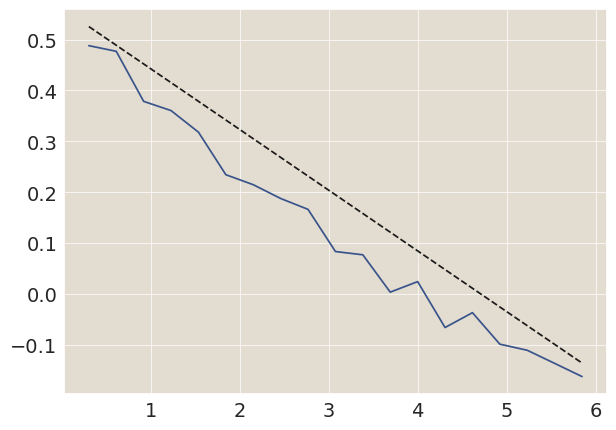

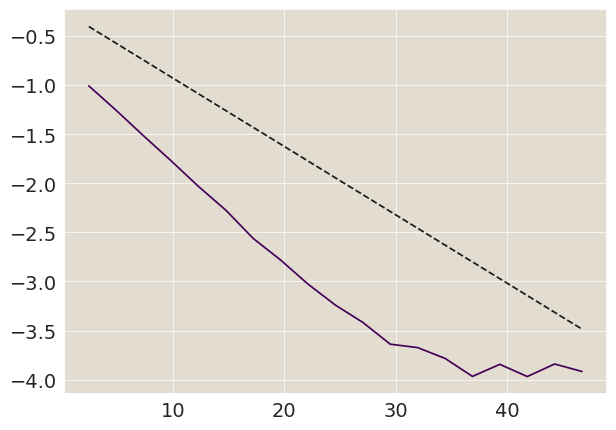

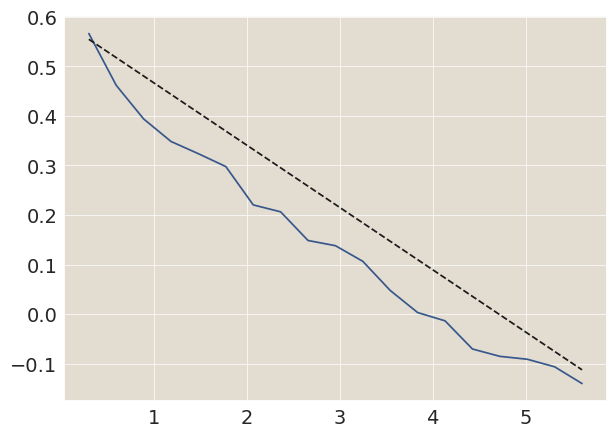

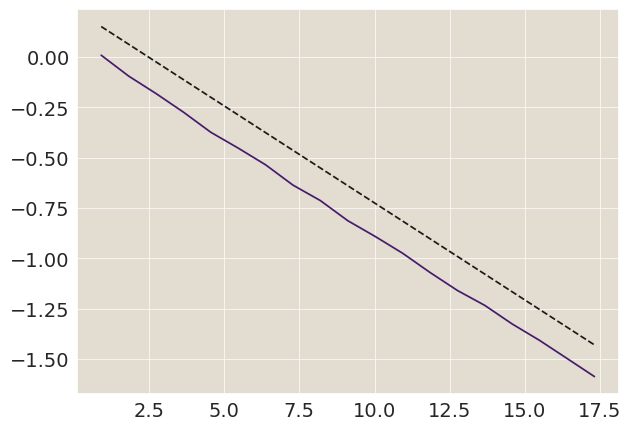

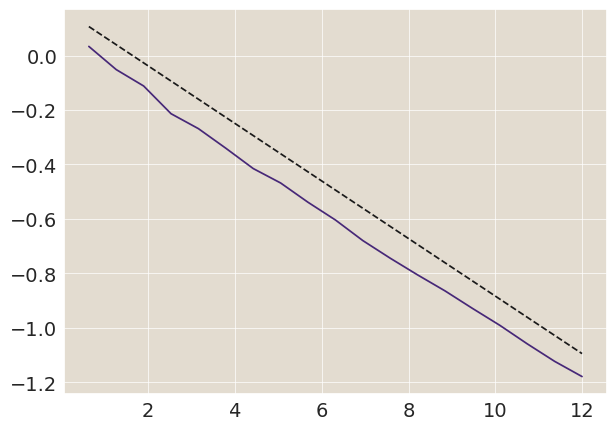

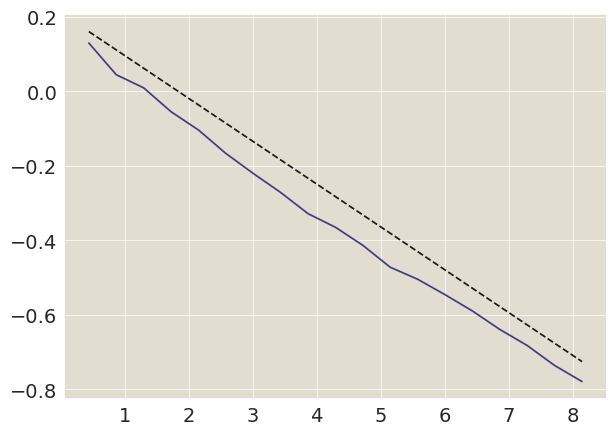

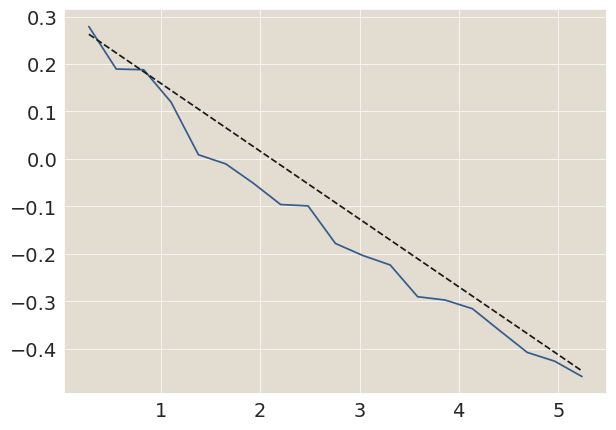

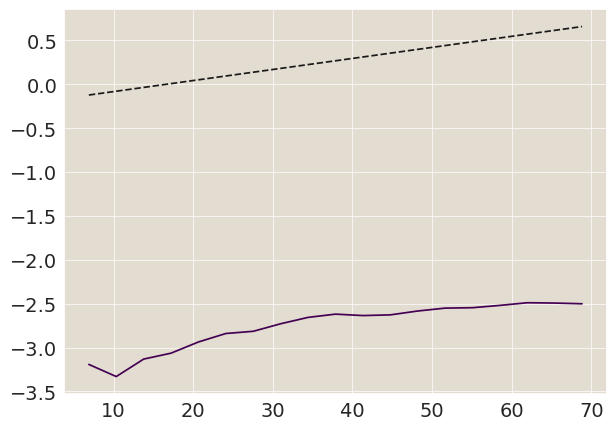

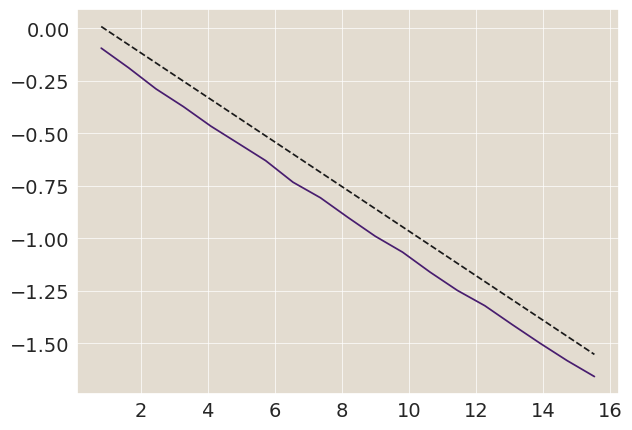

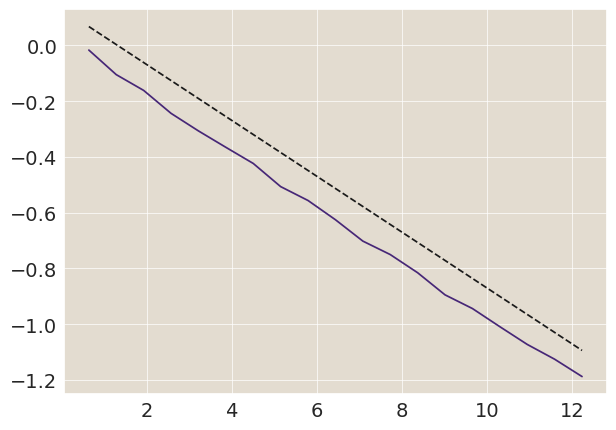

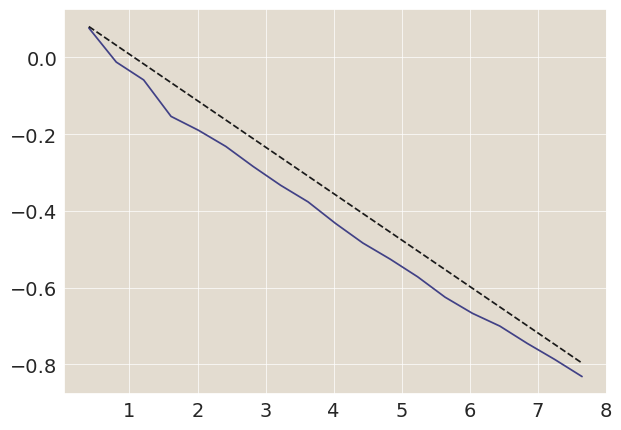

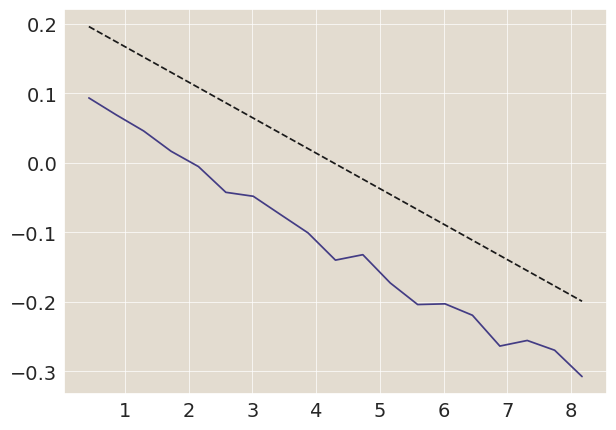

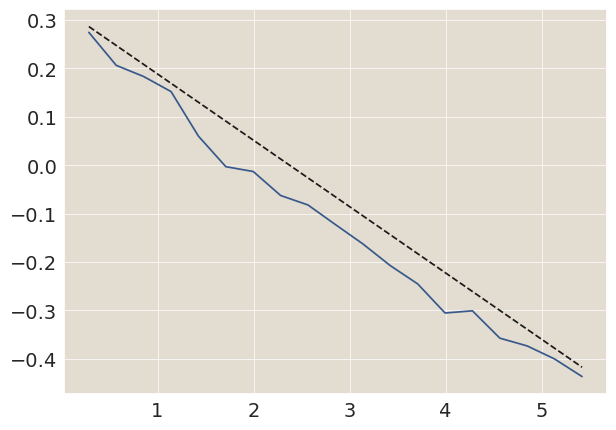

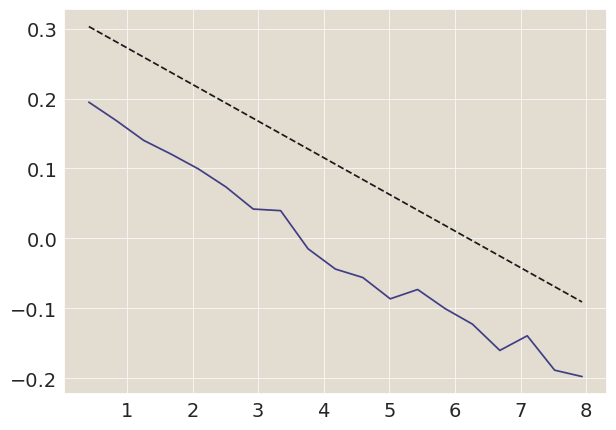

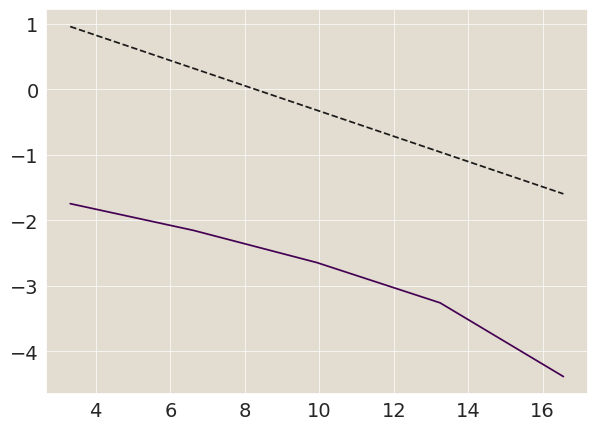

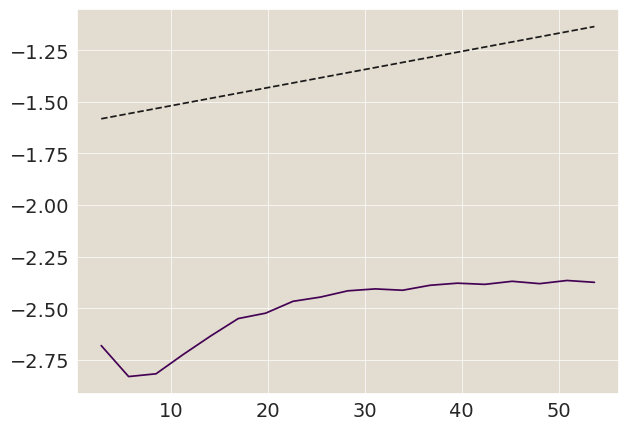

In [12]:
columns = fitting_information.columns

for row in fitting_information.values:
    i = row[np.where(columns == "Data Index")[-1]][0]
        
    y_o = row[np.where(columns == "Initial ATP Conc")[-1]][0]; 
    
    # Get time curve 
    time = np.array(times_list[i])

    # Generate a color
    color = plt.cm.viridis(y_o/1410);
    color = "#{:02x}{:02x}{:02x}".format(int(color[0] * 255),
                                         int(color[1] * 255),
                                         int(color[2] * 255))


    #### --------- With K_eff --------- ####

    K_eff = K_eff_func(y_o)
    
    # Non-dimensionalise time
    idealised_time_constant_K_eff = (K_T*(1 + (y_o*K_inv)))/(gamma*m);
    time_nd_K_eff = time/idealised_time_constant_K_eff; 
    
    # Non dimensionalise ATP 
    A_nd_K_eff = np.array(ATP_curve_list[i])/K_eff; 
    
    plt.figure()
    
    y_o = ATP_conc_list[i]; #initial ATP concentration (according to experimental plan)
    K_eff = K_eff_func(y_o)
    y3 = A_nd_K_eff - y_o/K_eff + np.log(A_nd_K_eff/(y_o/K_eff));
    
    slope = row[np.where(columns == "Fitted Parameters (-Slope, Y-intercept)")[-1]][0][0]
    cutoff = row[np.where(columns == "Fitted Parameters (-Slope, Y-intercept)")[-1]][0][1]

    plt.plot(time_nd_K_eff[n1:n2], y3[n1:n2], color = color)
    y = line(time_nd_K_eff[n1:n2], slope, cutoff)
    plt.plot(time_nd_K_eff[n1:n2], y, '--k')
